# Part 1. Loading packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

# Part 2. Reading the data

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_145b79165b744c1f9bced4c1f1b6cbf4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JWRB_LTmms_wCl4RKqgoo_erM3hMMbUfUTmahzbz5IHG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_145b79165b744c1f9bced4c1f1b6cbf4.get_object(Bucket='lifeexpectancy-donotdelete-pr-3ba1hbahvak2lh',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df.drop(axis= 1, labels= "Year", inplace= True)

In [6]:
df.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
status = pd.get_dummies(df["Status"])
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [8]:
df[["Developed", "Developing"]] = status

In [9]:
df.drop(axis= 1, labels= "Status", inplace=True)

In [10]:
df.head()

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [11]:
df = df.groupby(by= "Country").mean()

In [12]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# Part 3. EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
Life expectancy                    183 non-null float64
Adult Mortality                    183 non-null float64
infant deaths                      193 non-null float64
Alcohol                            191 non-null float64
percentage expenditure             193 non-null float64
Hepatitis B                        184 non-null float64
Measles                            193 non-null float64
 BMI                               189 non-null float64
under-five deaths                  193 non-null float64
Polio                              193 non-null float64
Total expenditure                  191 non-null float64
Diphtheria                         193 non-null float64
 HIV/AIDS                          193 non-null float64
GDP                                163 non-null float64
Population                         145 non-null float64
 thinness  1-19 years              189 non-nu

In [14]:
df.isna().sum()

Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [15]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['life expectancy', 'adult mortality', 'infant deaths', 'alcohol',
       'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'developed', 'developing'],
      dtype='object')

In [16]:
df.head()

,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,developed,developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
life expectancy                    183 non-null float64
adult mortality                    183 non-null float64
infant deaths                      193 non-null float64
alcohol                            191 non-null float64
percentage expenditure             193 non-null float64
hepatitis b                        184 non-null float64
measles                            193 non-null float64
bmi                                189 non-null float64
under-five deaths                  193 non-null float64
polio                              193 non-null float64
total expenditure                  191 non-null float64
diphtheria                         193 non-null float64
hiv/aids                           193 non-null float64
gdp                                163 non-null float64
population                         145 non-null float64
thinness  1-19 years               189 non-nu

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


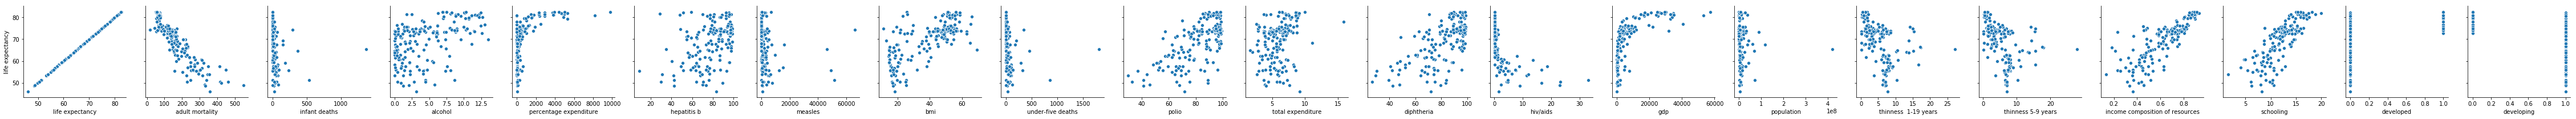

In [18]:
g = sns.pairplot(data= df, x_vars= df.columns, y_vars="life expectancy", size = 3)

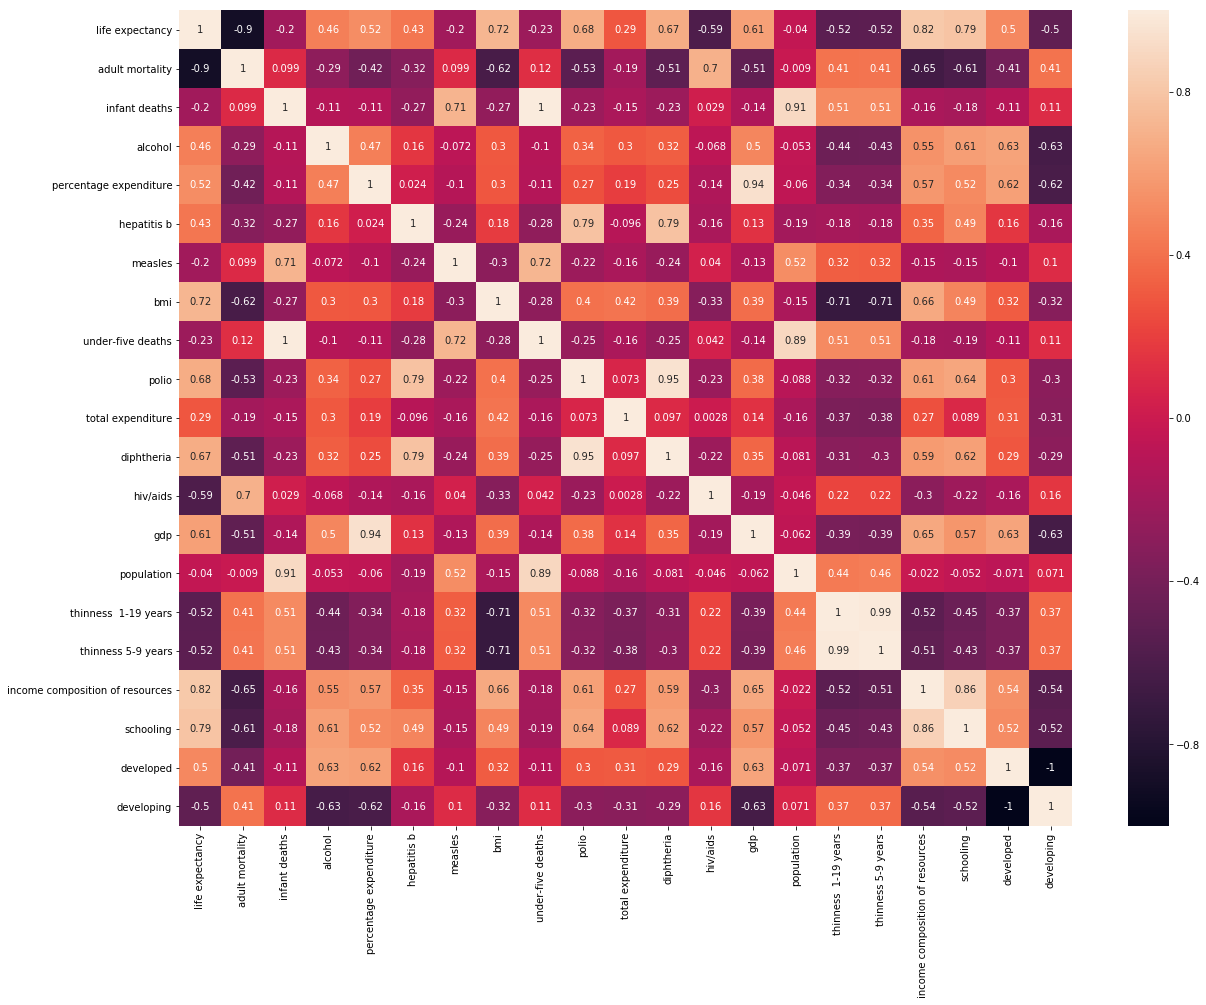

In [19]:
plt.figure(figsize= (20, 15))
sns.heatmap(df.corr(), annot= True)

# Part 4. Preprocessing the data

In [20]:
y = df["life expectancy"]
X = df.drop(axis= 1, labels= "life expectancy")

In [21]:
X.isna().sum()

adult mortality                    10
infant deaths                       0
alcohol                             2
percentage expenditure              0
hepatitis b                         9
measles                             0
bmi                                 4
under-five deaths                   0
polio                               0
total expenditure                   2
diphtheria                          0
hiv/aids                            0
gdp                                30
population                         48
thinness  1-19 years                4
thinness 5-9 years                  4
income composition of resources    17
schooling                          13
developed                           0
developing                          0
dtype: int64

In [22]:
X.fillna(value= X.mean(), inplace= True)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
adult mortality                    193 non-null float64
infant deaths                      193 non-null float64
alcohol                            193 non-null float64
percentage expenditure             193 non-null float64
hepatitis b                        193 non-null float64
measles                            193 non-null float64
bmi                                193 non-null float64
under-five deaths                  193 non-null float64
polio                              193 non-null float64
total expenditure                  193 non-null float64
diphtheria                         193 non-null float64
hiv/aids                           193 non-null float64
gdp                                193 non-null float64
population                         193 non-null float64
thinness  1-19 years               193 non-null float64
thinness 5-9 years                 193 non-nu

In [24]:
y.fillna(value= y.mean(), inplace= True)

In [25]:
y.isna().sum()

0

In [26]:
X.describe()

,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,developed,developing
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,164.796448,28.831930,4.439915,708.811674,78.518282,2302.060233,39.554530,39.993847,82.430450,6.028265,82.228442,1.662338,7223.452050,1.257006e+07,4.682870,4.710780,0.629502,11.894097,0.165803,0.834197
std,93.646844,113.136586,3.859423,1449.445611,18.374639,7886.208390,17.418422,153.559716,16.711678,2.199477,17.186686,4.345711,9814.248514,3.304834e+07,4.053585,4.137769,0.174557,3.221361,0.372871,0.372871
min,18.750000,0.000000,0.010000,0.000000,8.000000,0.000000,5.200000,0.000000,9.000000,1.646667,9.000000,0.100000,136.183210,2.920000e+02,0.100000,0.100000,0.131688,0.000000,0.000000,0.000000
25%,89.000000,0.000000,0.992000,26.120391,69.000000,3.312500,21.325000,0.000000,71.750000,4.681333,72.375000,0.100000,1087.435774,1.550208e+06,1.650000,1.668750,0.494375,10.087500,0.000000,1.000000
50%,152.062500,2.562500,3.582667,139.156838,81.285714,130.625000,43.631250,3.250000,88.000000,5.972667,88.187500,0.100000,3933.012174,6.474880e+06,3.512500,3.600000,0.638625,12.200000,0.000000,1.000000
75%,214.812500,20.750000,7.420000,508.494033,94.312500,1497.187500,52.300000,24.875000,96.000000,7.070667,96.000000,0.818750,7223.452050,1.257006e+07,7.075000,6.981250,0.749125,13.962500,0.000000,1.000000
max,550.062500,1366.687500,13.497333,9801.810377,99.000000,65857.937500,87.300000,1812.500000,99.000000,17.240000,99.000000,32.943750,57362.874601,4.214677e+08,27.100000,27.943750,0.931437,20.037500,1.000000,1.000000


In [27]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
X

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3)

# Part 5 Linear Regression and additions

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
linear_model.coef_

array([-2.71960073e+01,  9.94872814e+01,  2.51640307e+00,  3.16185093e+00,
       -4.81067733e+00,  1.16202302e+00,  3.01689476e+00, -1.17064256e+02,
       -2.95847794e+00,  1.19845337e+00,  1.19173029e+01, -4.76380320e+00,
        6.26810380e-02,  1.24118754e+01,  3.43617983e-01,  1.92571694e+00,
        4.11019143e+00,  8.53912362e+00, -2.15254748e-01,  2.15254748e-01])

In [33]:
linear_model.intercept_

62.38966919243669

In [34]:
# predict the answers here...

y_pred = linear_model.predict(X_test)

In [35]:
y_pred

array([64.55423662, 71.67155594, 71.03757108, 66.67655334, 71.66929748,
       60.97306335, 75.52518514, 58.59669067, 46.44801925, 72.75415102,
       65.70237437, 83.89206375, 70.71819793, 77.23011077, 59.43626211,
       57.00872125, 77.74384885, 81.28014106, 73.04345427, 64.64297062,
       76.29919888, 71.88414232, 54.51788968, 78.8718064 , 68.89620531,
       63.33264066, 72.66717331, 60.63186877, 73.05906356, 72.84713941,
       69.62829303, 71.43100115, 59.76215791, 72.48647707, 65.56578319,
       61.53815715, 72.09824101, 72.31660145, 68.60166854, 64.48991412,
       80.75214928, 70.94144394, 74.25873764, 71.7089881 , 69.12615182,
       73.77613345, 81.95149604, 55.04288527, 75.5519421 , 79.76493522,
       80.32786699, 72.34732902, 77.18585015, 58.60801704, 73.45104416,
       53.29502361, 76.65725117, 80.04988824])

In [36]:
print("Mean_square_error: ", mean_squared_error(y_test, y_pred))

Mean_square_error:  6.713689587770414


In [37]:
print("R^2 score: ", r2_score(y_test, y_pred))

R^2 score:  0.8970967356330897


In [38]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(X_train, y_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(X_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(X_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.43878e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.43878e-18): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.43878e-18): result may not be accurate.
  overwrite_a=True).T


Best Parameters: {'alpha': 0, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.90
Mean squared error: 6.71
Mean absolute error: 2.00


In [39]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(X_train, y_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(X_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(X_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

Best Parameters: {'alpha': 0, 'max_iter': 100}
R^2 score on training data: 0.93
R^2 score: 0.90
Mean squared error: 6.71
Mean absolute error: 2.00


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Part 5 Linear Regression with Polynomial Features

In [40]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(X_train)
life_features_train_quad = quad_feature_transformer.transform(X_train)
life_features_test_quad = quad_feature_transformer.transform(X_test)

In [41]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, y_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, y_train)
print(accuracy_score_quad)

1.0


In [42]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [43]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(y_test, poly_model_quad_predict))

Mean squared error: 1534.31
Mean absolute error: 18.40
R_square score: -22.52


# Part 6 Decision Tree Regression

In [44]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(X_train, y_train)

decision_tree_score = cross_val_score(decision_tree_fit, X_train, y_train, cv = 5)
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(X_train, y_train))
print("R^2 score on the test data %.2f"% r2_score(y_test, decision_tree_fit.predict(X_test)))

mean cross validation score: 0.76
score without cv: 1.00
R^2 score on the test data 0.84


In [45]:
decision_tree_model_predict = decision_tree_model.predict(X_test)

In [46]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(X_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(X_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, decision_tree_model_predict))

Best Parameters: {'min_samples_split': 7}
R^2 score on training data: 0.99
R^2 score: 0.85
Mean squared error: 10.56
Mean absolute error: 2.48


# Part 7 Random Forest Regression

In [47]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(X_train, y_train)

random_forest_score = cross_val_score(random_forest_fit, X_train, y_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(X_train, y_train))
print("R^2 score on the test data %.2f"
      %r2_score(y_test, random_forest_fit.predict(X_test)))

mean cross validation score: 0.89
score without cv: 0.98
R^2 score on the test data 0.92


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
random_forest_model_predict = random_forest_model.predict(X_test)

In [49]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(X_train, y_train))
print("R^2 score: %.2f"
      % r2_score(y_test, grid_cv.best_estimator_.predict(X_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, random_forest_model_predict))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

Best Parameters: {'min_samples_split': 6}
R^2 score on training data: 0.98
R^2 score: 0.91
Mean squared error: 5.03
Mean absolute error: 1.78


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-16 09:53:03,982 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [51]:
wml_credentials = {
  "apikey": "Y3f7_zOekbu5wGkCEMVBdBvjumC5FAv2TiYPi3ybr_tg",
  "iam_apikey_description": "Auto-generated for key d9c2e854-359b-4f75-a0a3-a78affe5e265",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/4cb1c60260924e30a3c729cd553ab5ad::serviceid:ServiceId-22b21cd4-a544-4083-9021-3bfa17020079",
  "instance_id": "be403ae7-2fbd-4273-b182-9327078b349d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [52]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [53]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Sunny",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "SI05202001113@smartinternz.com",
    client.repository.ModelMetaNames.NAME : "Life Expectancy"
}

In [54]:
model_artifact = client.repository.store_model(linear_model, meta_props = model_props)

In [55]:
model_artifact

{'metadata': {'guid': '462df0f0-4261-42b7-b6e6-294b12d0b7fd',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/published_models/462df0f0-4261-42b7-b6e6-294b12d0b7fd',
  'created_at': '2020-06-16T09:53:04.532Z',
  'modified_at': '2020-06-16T09:53:04.591Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/published_models/462df0f0-4261-42b7-b6e6-294b12d0b7fd/learning_configuration',
  'author': {'name': 'Sunny'},
  'name': 'Life Expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/published_models/462df0f0-4261-42b7-b6e6-294b12d0b7fd/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/published_models/462df0f0-4261-42b7-b6e6-294b12d0b7fd/feedback',
  'latest_version': {'url': 'ht

In [56]:
guid = client.repository.get_model_uid(model_artifact)

In [57]:
guid

'462df0f0-4261-42b7-b6e6-294b12d0b7fd'

In [58]:
deploy = client.deployments.create(guid, name = "life expectancy")



#######################################################################################

Synchronous deployment creation for uid: '462df0f0-4261-42b7-b6e6-294b12d0b7fd' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b'
------------------------------------------------------------------------------------------------




In [59]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b  life expectancy  online  DEPLOY_SUCCESS  2020-06-16T09:53:06.974Z  scikit-learn-0.20  model
f8cf4613-0b1b-4dbb-acf0-afb96053936a  life expectancy  online  DEPLOY_SUCCESS  2020-06-14T21:36:45.492Z  scikit-learn-0.20  model
6a145e5a-dea3-48fe-bb2c-51051d0f1a1a  life expectancy  online  DEPLOY_SUCCESS  2020-06-14T19:19:10.854Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [60]:
deploy

{'metadata': {'guid': '1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/deployments/1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b',
  'created_at': '2020-06-16T09:53:06.974Z',
  'modified_at': '2020-06-16T09:53:07.262Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'life expectancy',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/deployments/1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b/online',
  'deployable_asset': {'name': 'Life Expectancy',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/published_models/462df0f0-4261-42b7-b6e6-294b12d0b7fd',
   'guid': '462df0f0-4261-42b7-b6e6-294b12d0b7fd',
   'created_at': '2020-06-16T09:53:06.947Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'status':

In [61]:
scoring_url = client.deployments.get_scoring_url(deploy)
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/be403ae7-2fbd-4273-b182-9327078b349d/deployments/1371b6fb-62c3-4d8f-bf6a-9c4ec3bc8b9b/online'

In [62]:
df.head()

,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,developed,developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [63]:
X_test[0]

array([0.28149629, 0.01243883, 0.40601058, 0.00368597, 0.35897436,
       0.00109231, 0.41504263, 0.01368966, 0.49791667, 0.2909363 ,
       0.43333333, 0.08030447, 0.00521045, 0.00914036, 0.15347222,
       0.14927048, 0.41309784, 0.4217093 , 0.        , 1.        ])

In [64]:
linear_model.predict(X_test)

array([64.55423662, 71.67155594, 71.03757108, 66.67655334, 71.66929748,
       60.97306335, 75.52518514, 58.59669067, 46.44801925, 72.75415102,
       65.70237437, 83.89206375, 70.71819793, 77.23011077, 59.43626211,
       57.00872125, 77.74384885, 81.28014106, 73.04345427, 64.64297062,
       76.29919888, 71.88414232, 54.51788968, 78.8718064 , 68.89620531,
       63.33264066, 72.66717331, 60.63186877, 73.05906356, 72.84713941,
       69.62829303, 71.43100115, 59.76215791, 72.48647707, 65.56578319,
       61.53815715, 72.09824101, 72.31660145, 68.60166854, 64.48991412,
       80.75214928, 70.94144394, 74.25873764, 71.7089881 , 69.12615182,
       73.77613345, 81.95149604, 55.04288527, 75.5519421 , 79.76493522,
       80.32786699, 72.34732902, 77.18585015, 58.60801704, 73.45104416,
       53.29502361, 76.65725117, 80.04988824])